# Classifying Handwritten Digits
# Repeated now with Convolutional Neural Network

## Tensorflow and Keras

[Keras website](https://keras.io/about/):  

'''
[TensorFlow 2](https://www.tensorflow.org/) is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming. It combines four key abilities:

* Efficiently executing low-level tensor operations on CPU, GPU, or TPU.
* Computing the gradient of arbitrary differentiable expressions.
* Scaling computation to many devices, such as clusters of hundreds of GPUs.
* Exporting programs ("graphs") to external runtimes such as servers, browsers, mobile and embedded devices.

Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.
'''

In [ ]:
from tensorflow import keras

## MNIST database samples
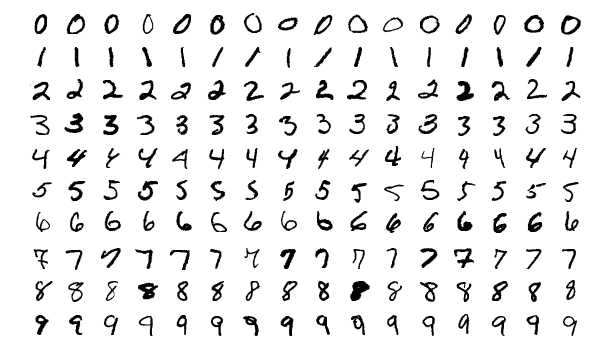

In [ ]:
from keras.datasets import mnist

Load training and test sets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

In [ ]:
len(train_labels)

In [ ]:
train_labels

In [ ]:
test_images.shape

In [ ]:
len(test_labels)

In [ ]:
test_labels

In [ ]:
digit = train_images[4]
digit_label = train_labels[4]

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(digit_label)

# Define the model

The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. 

Adding layers is simple: use the `add` method
* input_shape for the input layer has to match the number of features
* activation on the output layer is commonly softmax for classification, as that returns values in the range (0,1), and values sum to 1. 

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()

In [ ]:
network.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', 
                        input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D(pool_size=(2, 2)))

network.add(layers.Flatten())

network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

Specifying algorithms to use in the training:
* "Root Mean Squared Propagation, or RMSProp, is an extension of gradient descent .. that uses a decaying average of partial gradients in the adaptation of the step size for each parameter. The use of a decaying moving average allows the algorithm to forget early gradients and focus on the most recently observed partial gradients seen during the progress of the search" -- [reference](https://machinelearningmastery.com/gradient-descent-with-rmsprop-from-scratch/#:~:text=Root%20Mean%20Squared%20Propagation%2C%20or,step%20size%20for%20each%20parameter.)
* Categorical cross-entropy is commonly used as a loss metric for multi-group classification.  Cross-entropy is a measure of the difference between two probability distributions

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.summary()

In [ ]:
#train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
#test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape

## Train the model

Here we have two parameters in addition to the training data and training labels.
1. `epochs`: the number times the algorithm will go through your entire set of training data
2. `batch_size`: the number of training data samples the model will use before updating the weights
    * note that for 60,000 samples, a batch size of 128 will break the dataset into 60000/128 = 469 subsets

In [ ]:
model = network.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
import matplotlib.pyplot as plt

history_dict = model.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.title('Training loss vs accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
network.layers

In [ ]:
network.layers[0].get_weights()[0].shape

In [ ]:
network.layers[0].get_weights()[1].shape

In [ ]:
fig,ax = plt.subplots(4,8,figsize=(8,5))
for i in range(32):
    plt.subplot(4,8,i+1)
    sample = network.layers[0].get_weights()[0][:,:,:,i]
    plt.imshow(sample, cmap='binary')
fig.tight_layout()

## Evaluate the model using the test data

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print('test_acc:', test_acc)

In [ ]:
digit = test_images[4]
digit_label = test_labels[4]

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digit.reshape((28, 28)), cmap=plt.cm.binary)
plt.show()
print(digit_label)

In [ ]:
digit_label

In [ ]:
import numpy as np

In [ ]:
np.argmax(digit_label)

In [ ]:
test_images.shape

In [ ]:
test_images[4].shape

In [ ]:
network.predict(test_images[4].reshape(1,28,28))

In [ ]:
test_image_sample = test_images[4].reshape(1,28,28)

pred_sample = network.predict(test_image_sample)

np.argmax(pred_sample)

In [ ]:
network.predict(test_images[:5])

In [ ]:
for i in network.predict(test_images[:5]):
    print(np.argmax(i))

In [ ]:
test_labels.shape

In [ ]:
pred_labels = []
for i in network.predict(test_images[:]):
    pred_labels.append(np.argmax(i))

In [ ]:
len(pred_labels)

In [ ]:
test_labels[0]

In [ ]:
to_categorical(pred_labels)

In [ ]:
pred_labels = to_categorical(pred_labels)

In [ ]:
import sklearn.metrics

In [ ]:
# Remember, this will give an error:
# cm = sklearn.metrics.confusion_matrix(test_labels, pred_labels)
# cm

In [ ]:
y1 = []
y2 = []
for i in range(test_labels.shape[0]):
    y1.append(np.argmax(test_labels[i]))
    y2.append(np.argmax(pred_labels[i]))
    

In [ ]:
cm = sklearn.metrics.confusion_matrix(y1, y2)
cm

In [ ]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y1, y2):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y1, y2, average='micro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y1, y2, average='micro'):.2%}")